<a href="https://colab.research.google.com/github/thedatadj/FruitClassifier/blob/main/using_Support_Vector_Machines_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What I learned
- To use a Support Vector Machine algorithm for multiclass classification.

# Linear Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Loading the dataset

fruit_data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Workspace/Fruit Classifier/Fruit Classifier using KNN/fruit_data_with_colors.txt")


fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# Splitting the dataset into X and y.
# I utilize only two input features

X = fruit_data[["height", "width"]]
y = fruit_data["fruit_label"]

In [ ]:
# This function splits the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1).ravel()

# Data distribution
shapes = {"X": [X.shape, X_train.shape, X_test.shape],
          "y": [y.shape, y_train.shape, y_test.shape],
          "Percent": ["100%", "75%", "25%"]}

pd.DataFrame(shapes, index=["Data", "Train", "Test"])

,X,y,Percent
Data,"(59, 2)","(59,)",100%
Train,"(44, 2)","(44, 1)",75%
Test,"(15, 2)","(15,)",25%


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="linear", random_state=0)
model.fit(X_train, y_train.ravel())

SVC(kernel='linear', random_state=0)

## Hyperparameter search

<Axes: >

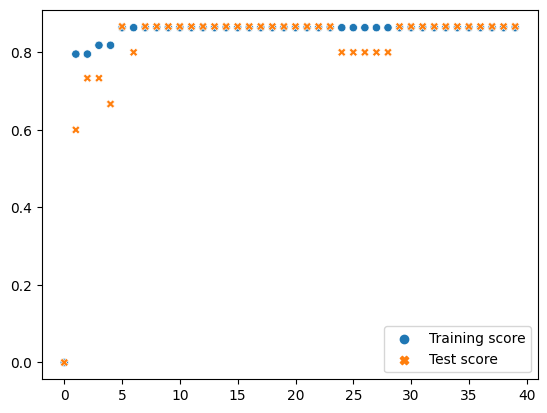

In [ ]:
X_train_scores = [0]
X_test_scores = [0]

for k in range(1,40):
    model.C = k
    model.fit(X_train, y_train.ravel())


    # Evaluate Model Performance on Training and Test Sets

    X_train_scores.append(model.score(X_train, y_train))
    X_test_scores.append(model.score(X_test, y_test))

scores = pd.DataFrame([X_train_scores, X_test_scores], index=["Training score", "Test score"])


sns.scatterplot(scores.T)

## Performance

In [ ]:
model.C = 10
model.fit(X_train, y_train)

X_train_score = model.score(X_train, y_train)
X_test_score = model.score(X_test, y_test)
print("Training score {:.2f}%".format(X_train_score*100),
      "\nTest score {:.2f}%".format(X_test_score*100))

Training score 86.36% 
Test score 86.67%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Visualizations

Text(0.5, 1.0, 'Test prediction')

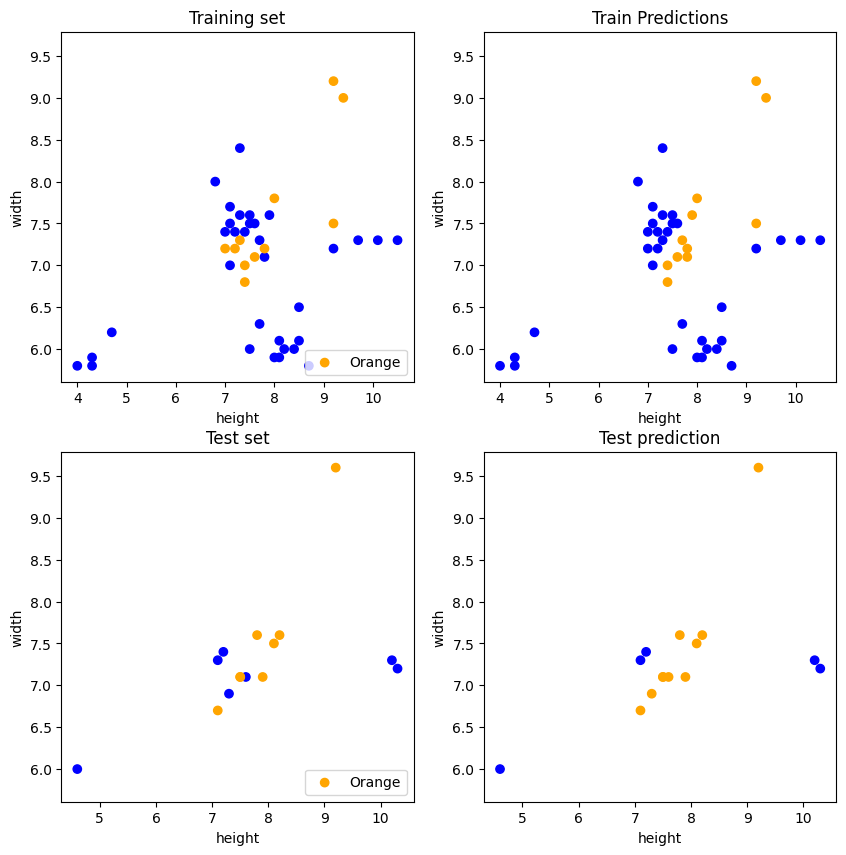

In [ ]:
import matplotlib.pyplot as plt

train_predictions = model.predict(X_train)*1
test_predictions = model.predict(X_test)*1

# Create a new canvas
plt.figure(figsize=(10,10))

# Colors

colors_train = ['orange' if label == 3 else 'blue' for label in y_train]
colors_test = ['orange' if label == 3 else 'blue' for label in y_test]
colors_train_predictions = ['orange' if label == 3 else 'blue' for label in train_predictions]
colors_test_predictions = ['orange' if label == 3 else 'blue' for label in test_predictions]


# Top Left plot

ax1 = plt.subplot(2,2,1)

plt.scatter(X_train.height,
            X_train.width,
            c=colors_train,
            label="Orange")

plt.ylabel("width")
plt.xlabel("height")
plt.title("Training set")
plt.legend(loc=4, frameon=True)

# Top Right plot

ax2 = plt.subplot(2,2,2, sharey=ax1)

plt.scatter(X_train.height,
            X_train.width,
            c=colors_train_predictions)

#plt.plot([2.31,12.08],[0.94,5.26])

plt.plot()

plt.xlabel("height")
plt.ylabel("width")
plt.title("Train Predictions")

# Bottom Left plot
ax3 = plt.subplot(2,2,3, sharey=ax1)

plt.scatter(X_test.height,
            X_test.width,
            c=colors_test,
            label="Orange")

plt.ylabel("width")
plt.xlabel("height")
plt.title("Test set")
plt.legend(loc=4, frameon=True)

# Bottom Right plot
ax3 = plt.subplot(2,2,4, sharey=ax1)

plt.scatter(X_test.height,
            X_test.width,
            c=colors_test_predictions)

plt.xlabel("height")
plt.ylabel("width")
plt.title("Test prediction")